In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="#009e84"> ch02. 군집분석</font></b>


# 1절. 군집모델(클러스터링)
- 클러스터(cluster) : 독립변수의 특성이 유사한 데이터의 그룹
- 클러스터링(clustering) : 주어진 데이터를 여러 개의 클러스터로 구분하는 것
1) [중심 기반 클러스터링(K-Means)](https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg)
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg"
style="display: block; margin-left: 0; width: 20%;">
2) [연결기반 클러스터링(DBSCAN)](https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg)
<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/DBSCAN-density-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">  
3) [밀도기반 클러스터링(DBSCAN의 변형으로 OPTICS)](https://commons.wikimedia.org/wiki/File:OPTICS-Gaussian-data.svg)
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/OPTICS-Gaussian-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">

# 2절 K-Means 클러스터링

- 가장 단순하고 빠른 클러스터링 알고리즘
- 중심점을 찾아가는 알고리즘
- 세부 알고리즘 교안 6page

In [8]:
# 분류를 위한 가상의 데이터 생성

from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=20,    # 데이터 갯수  (기본값 100)
                           n_features=2,    # 독립변수 갯수(기본값 20)
                           n_informative=2, # 타겟변수에 영향을 미치는 독립변수 갯수
                           n_redundant=0,   # 타겟변수에 영향을 미치지 않는 독립변수 갯수
                           n_clusters_per_class=1, # 각 타겟변수 그룹별 서브그룹의 갯수
                           n_classes=2,    # 타겟변수의 그룹수
                           random_state=123)  

print(X.shape, y.shape)
np.c_[X, y][:3]

(20, 2) (20,)


array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ]])

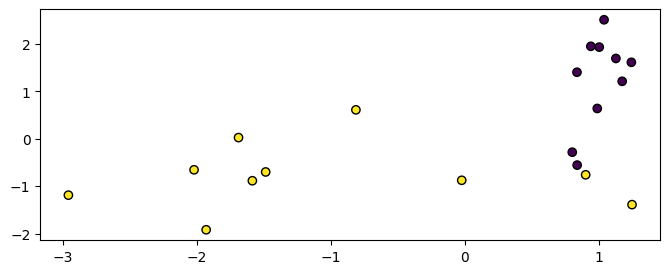

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
plt.scatter(x=X[:,0], y=X[:,1], c=y, edgecolors='k')
plt.show()

In [12]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2,     # 군의 갯수
               init='k-means++', # 초기 중심점을 서로 멀리 잡아 초기화 / random(초기중심 랜덤)
               n_init=10,        # 각 다른 초기갑스올 10번 실행해보고 가장 좋은 모델 선택
               max_iter=300)     # 각 실행해서 300번 미만으로 중심점을 옮김

model.fit(X)

KMeans(n_clusters=2, n_init=10)

In [23]:
centers = model.cluster_centers_ # 각 그룹의 중심점
print('model.labels :', model.labels_)
pred = model.predict(X)
print('       예측값 :', pred)
print('       실제값 :', y)

model.labels : [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
       예측값 : [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
       실제값 : [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


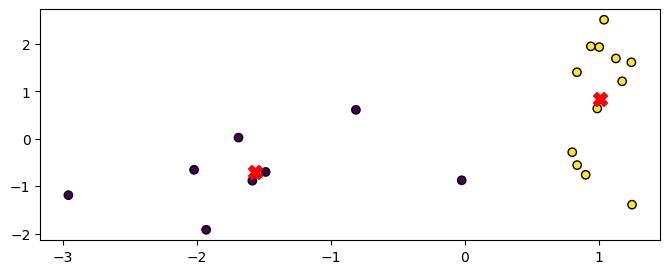

In [25]:
plt.figure(figsize=(8,3))
plt.scatter(x=X[:,0], y=X[:,1], c=pred, edgecolors='k')
plt.scatter(x=centers[:, 0], y=centers[:, 1], c='r', marker='X', s=100)
plt.show()

## cf. Normalizer(스케일러) 적용

In [27]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
Xnor = scaler.fit_transform(X)
np.c_[X, Xnor][:3]

array([[ 1.03859554,  2.51175389,  0.3821159 ,  0.92411441],
       [ 1.00271366,  1.93521549,  0.46005267,  0.88789162],
       [-1.6881048 ,  0.02599427, -0.99988146,  0.01539667]])

In [28]:
model = KMeans(n_clusters=2,
               init='random',
               n_init='auto', # init가 k-means++이면 1, init가 random이면 10번 돌려봄
               max_iter=300)
model.fit(Xnor)

KMeans(init='random', n_clusters=2, n_init='auto')

In [30]:
# 0그룹으로 분류된 Xnor

Xnor[model.labels_==0, 0] # x축
Xnor[model.labels_==0, 1] # y축

array([0.3821159 , 0.46005267, 0.76493676, 0.51161542, 0.83395074,
       0.55350265, 0.94318094, 0.43387458, 0.60980605, 0.66821427,
       0.83902767, 0.69516439])

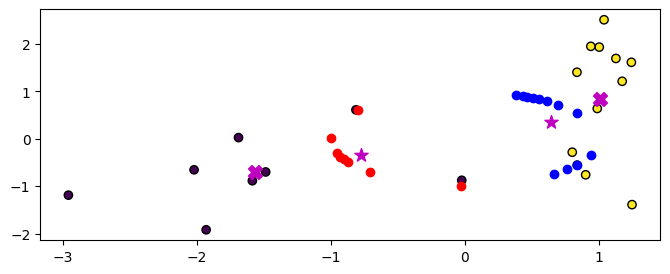

In [38]:
plt.figure(figsize=(8,3))
plt.scatter(x=X[:,0], y=X[:,1], c=pred, edgecolors='k')
plt.scatter(x=centers[:, 0], y=centers[:, 1], c='m', marker='X', s=100)
plt.scatter(x=Xnor[model.labels_==0, 0], y=Xnor[model.labels_==0, 1], c='b')
plt.scatter(x=Xnor[model.labels_==1, 0], y=Xnor[model.labels_==1, 1], c='r')
plt.scatter(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1], c='m', marker='*', s=100)
plt.show()

## K-Means 클러스터링의 한계점

(교안 13page)

- 군의 특성이 다를 경우
    - 군의 크기가 다른 경우
    - 군의 밀도가 다른 경우
    - 군이 비 구형
- 이상치를 포함할 경우 : 이상치를 조정하거나 삭제한 후 클러스터링

### 1) 군의 크기가 다른 경우

In [42]:
np.random.seed(0)

# group0 : 평균 -10, 표준편차 2인 10행 2열 배열
group0 = np.random.normal(loc=-10, scale=2, size=(10,2))
y = np.full(len(group0), 0)
group0 = np.c_[group0, y]
group0[:3]

array([[ -6.47189531,  -9.19968558,   0.        ],
       [ -8.04252403,  -5.5182136 ,   0.        ],
       [ -6.26488402, -11.95455576,   0.        ]])

In [43]:
# group1 : 평균 10, 표준편차 2인 10행 2열 배열

group1 = np.random.normal(loc=10, scale=2, size=(10,2))
y = np.full(len(group1), 1)
group1 = np.c_[group1, y]
group1[:3]

array([[ 4.89402037, 11.30723719,  1.        ],
       [11.7288724 ,  8.51566996,  1.        ],
       [14.53950925,  7.09126865,  1.        ]])

In [44]:
# group2 : 평균 0, 표준편차 5인 100행 2열 배열

group2 = np.random.normal(loc=0, scale=5, size=(100,2))
y = np.full(len(group2), 2)
group2 = np.c_[group2, y]
group2[:3]

array([[-5.24276483, -7.10008969,  2.        ],
       [-8.53135095,  9.75387698,  2.        ],
       [-2.54826091, -2.19037151,  2.        ]])

In [47]:
data = np.r_[group0, group1, group2]
data[::10], data.shape

(array([[-6.47189531, -9.19968558,  0.        ],
        [ 4.89402037, 11.30723719,  1.        ],
        [-5.24276483, -7.10008969,  2.        ],
        [-3.36230224, -1.79776581,  2.        ],
        [-5.8257492 ,  4.50413243,  2.        ],
        [ 9.41575349, -6.73879531,  2.        ],
        [ 1.88212766, -5.49700395,  2.        ],
        [-7.45628796,  2.19695851,  2.        ],
        [-2.49016225,  9.64766027,  2.        ],
        [-1.76996956, -6.87475647,  2.        ],
        [-1.84590919, -1.19689589,  2.        ],
        [-4.779725  , -1.72990888,  2.        ]]),
 (120, 3))

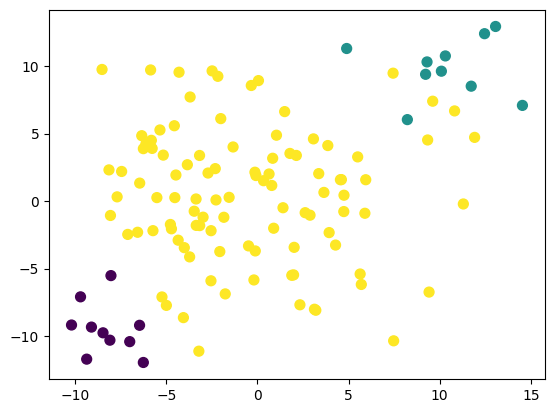

In [49]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=data[:, 2], s=50)
plt.show()

In [50]:
model = KMeans(n_clusters=3, init='k-means++', n_init='auto')
model.fit(data[:, :2])

KMeans(n_clusters=3, n_init='auto')

In [51]:
centers = model.cluster_centers_ # 중심점
centers

array([[-3.23795138,  3.79797742],
       [ 7.93234415,  5.526175  ],
       [-2.11638402, -5.40013046]])

In [53]:
# 똑같으니까 뭘 써도 상관없음

pred = model.predict(data[:, :2]) # 예측값
print(pred)
pred = model.labels_ # 모델이 클러스터링한 결과
print(pred)

[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 2 0 0 2 2 2 2 0 0 1 2
 2 2 0 0 2 1 1 0 0 0 0 0 0 2 0 0 2 1 1 0 0 1 1 2 0 0 0 1 0 0 0 2 2 0 0 1 0
 2 0 2 2 2 2 0 1 0 2 1 1 2 0 2 0 2 2 2 0 0 0 2 2 1 1 2 1 2 2 2 1 2 2 0 1 2
 0 0 0 2 2 0 0 2 0]
[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 2 0 0 2 2 2 2 0 0 1 2
 2 2 0 0 2 1 1 0 0 0 0 0 0 2 0 0 2 1 1 0 0 1 1 2 0 0 0 1 0 0 0 2 2 0 0 1 0
 2 0 2 2 2 2 0 1 0 2 1 1 2 0 2 0 2 2 2 0 0 0 2 2 1 1 2 1 2 2 2 1 2 2 0 1 2
 0 0 0 2 2 0 0 2 0]


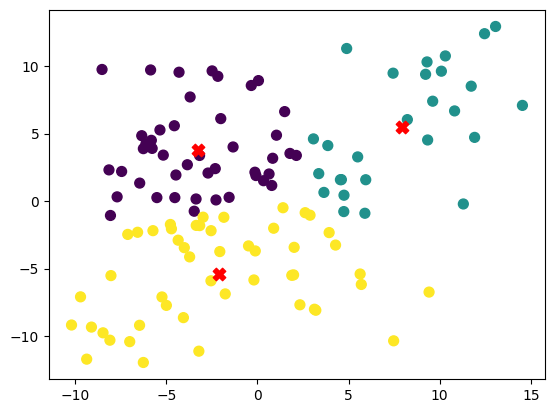

In [59]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=50)
plt.scatter(x=centers[:, 0], y=centers[:, 1], c='r', marker='X', s=80)
plt.show()

In [60]:
# 위의 단점을 보완하고자 6개 그룹으로 clustering

model = KMeans(n_clusters=6, n_init=10)
model.fit(data[:, :2])

KMeans(n_clusters=6, n_init=10)

In [61]:
centers = model.cluster_centers_
pred = model.labels_
pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0,
       4, 0, 4, 4, 1, 5, 5, 4, 4, 3, 1, 4, 4, 5, 1, 1, 4, 4, 0, 1, 2, 5,
       0, 0, 5, 5, 0, 5, 1, 0, 0, 4, 2, 2, 0, 0, 5, 5, 1, 5, 4, 0, 5, 4,
       4, 0, 5, 1, 4, 5, 2, 0, 4, 0, 4, 1, 1, 4, 0, 5, 0, 3, 5, 5, 1, 0,
       4, 4, 1, 3, 1, 4, 0, 4, 1, 5, 5, 2, 4, 5, 1, 1, 5, 5, 1, 4, 5, 5,
       4, 4, 4, 5, 4, 4, 4, 0, 1, 5])

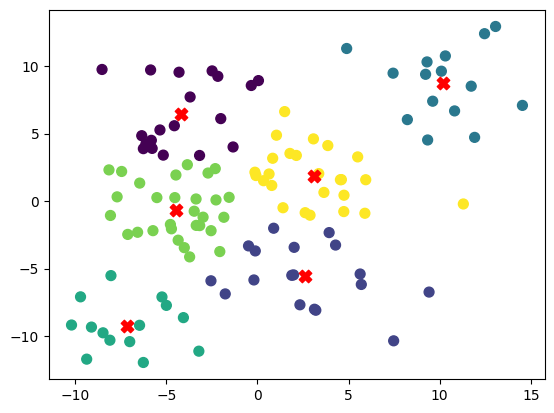

In [63]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=50)
plt.scatter(x=centers[:, 0], y=centers[:, 1], c='r', marker='X', s=80)
plt.show()

In [66]:
data[pred==0, 0] # 0번 그룹의 x축 데이터

array([-8.53135095, -6.2639768 , -5.8257492 , -5.35376311, -2.01588473,
        0.0525001 , -6.35242499, -5.86561703, -4.30612843, -1.34001685,
       -2.17576776, -3.17923039, -4.56411113, -0.34120803, -2.49016225,
       -6.12717759, -5.17121421, -3.69781498, -5.78091216])

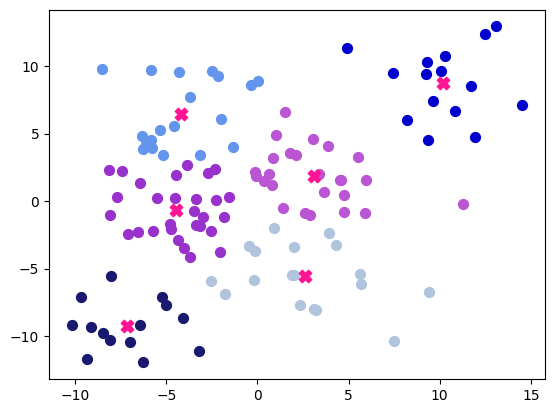

In [85]:
colors = ['cornflowerblue', 'lightsteelblue', 'mediumblue', 'midnightblue', 'darkorchid', 'mediumorchid'] # 0,1,4,5 / 2 / 3

# plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=50)
for i in range(len(colors)):
    plt.scatter(x=data[pred==i, 0], y=data[pred==i, 1], c=colors[i], s=50)
plt.scatter(x=centers[:, 0], y=centers[:, 1], c='deeppink', marker='X', s=80)
plt.show()

### 2) 밀도가 다를 경우

In [ ]:
# 똑같은 방식

# 3절 Hierarchical 클러스터링(계층적 군집분석)

- 계층적 분석(linkage) → Dendrogram → fcluster를 이용해서 클러스터를 생성
    - 군끼리 묶으면서 최종적으로 하나의 군집이 될 때까지 군을 묶는 클러스터링 알고리즘
    - 군집의 수를 미리 정해주지 않아도됨
    - Dendrogram을 이용하여 다양한 군집 수 시각화

In [90]:
from seaborn import load_dataset

iris = load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
89,5.5,2.5,4.0,1.3,versicolor


In [91]:
# 계층적 군집결과와 맞추기 위한 라벨 인코딩. 데이터에 문자가 있으면 안돼서 덮어버리는것

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
iris['species'] = le.fit_transform(iris.species)
iris.loc[::50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
100,6.3,3.3,6.0,2.5,2


In [93]:
from scipy.cluster.hierarchy import linkage

# method='single' : 가장 가까운 거리를 사용
# method='complete' : 가장 먼 거리를 이용
cluster_model = linkage(iris, method='complete') 
cluster_model.shape # 데이터 하나 적은 이유는 1,2,3 이 있으면 1과 2비교, 1과2의 비교를 3과 비교 해서

(149, 4)

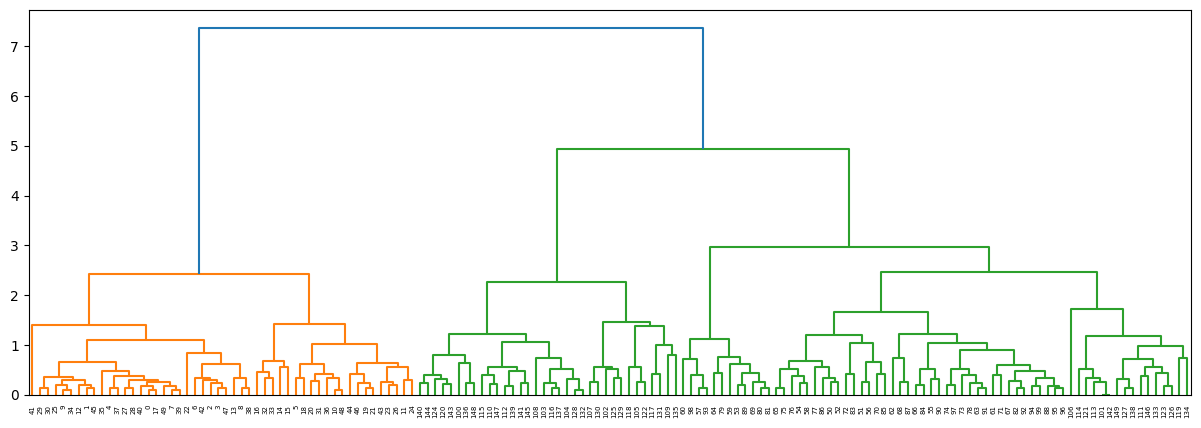

In [98]:
# dendrogram

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
dendrogram(cluster_model, labels=iris.index)

# 파일로 저장
plt.savefig('data/ch02_dendrogram.png', dpi=300)

plt.show()

In [99]:
# 클러스터링

from scipy.cluster.hierarchy import fcluster
fcluster(cluster_model, # linkage()로 만든 클러스터링 결과
         t=4, # 위 dendrogram의 y축을 보고 정하는것. 위에 그래프를 보면 4에서 선을 쭉 그어보면 3개그룹으로 잡힘. 클러스터를 나누는 임계값 (threshold)
         criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [100]:
pred = fcluster(cluster_model, 4, criterion='distance')
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [102]:
# pred에서 1은 0으로 3은 1로, 2는 그대로 변경

np.choose([3, 3, 2, 1, 2], [0, 10, 20, 30]) # np.choose(인덱스, 값)

array([30, 30, 20, 10, 20])

In [104]:
# 조정된 예측치(실제값 : iris.species)

adjusted_pred = np.choose(pred, [999, 0, 2, 1]) # 0은 pred에 없는거라 아무거나 쓴것
adjusted_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [105]:
import pandas as pd

pd.crosstab(iris.species, adjusted_pred, rownames=['real'], colnames=['predict'],
            margins=True) # 행과 열의 총계 추가

predict,0,1,2,All
real,,,,
0,50,0,0,50
1,0,50,0,50
2,0,16,34,50
All,50,66,34,150


In [107]:
original_species = le.inverse_transform(iris.species)
pred_species = le.inverse_transform(adjusted_pred)

pd.crosstab(original_species, pred_species,rownames=['real'], colnames=['predict'],
            margins=True)

predict,setosa,versicolor,virginica,All
real,,,,
setosa,50,0,0,50
versicolor,0,50,0,50
virginica,0,16,34,50
All,50,66,34,150


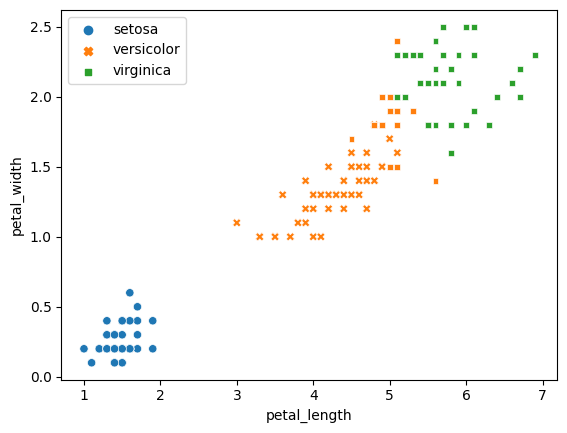

In [113]:
import seaborn as sns

sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue=pred_species,
                style=original_species)
plt.show()

# 4절 DBSCAN 클러스터링

- 연결 기반(밀도 기반) 군집화 알고리즘.이상치를 자동 감지
- 단점 : 클러스터의 밀도가 일정하지 않으면 성능이 낮아짐

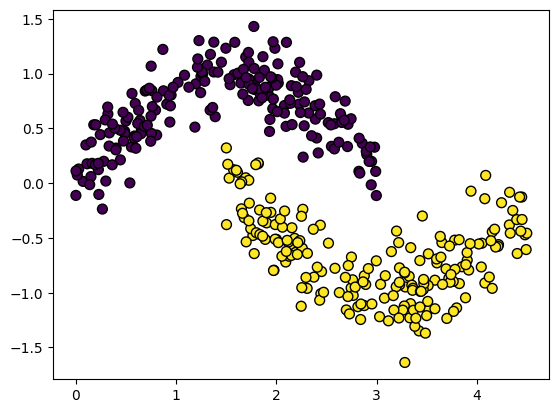

In [175]:
X1 = np.random.rand(200)*3 # 0 <= rand(데이터 갯수) < 1 : 균등분포  / *3을 하여 0~3 사이의 데이터 200개
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1)+noise
# plt.scatter(x=X1, y=Y1)
group1 = np.c_[X1, Y1, np.full(len(X1), 0)]

X2 = X1 + 1.5
noise = np.random.normal(0, 0.23, X1.shape)
Y2 = np.cos(X2) + noise
# plt.scatter(X2, Y2)
group2 = np.c_[X2, Y2, np.full(len(X2), 1)]

data = np.r_[group1, group2]

plt.scatter(x=data[:, 0], y=data[:, 1], c=data[:, 2], s=50, edgecolors='k')
plt.show()

In [142]:
# KMeans : 거리 기반 클러스터링

from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, init='random', n_init=10)
model.fit(data[:, :2])
pred = model.predict(data[:, :2])
pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

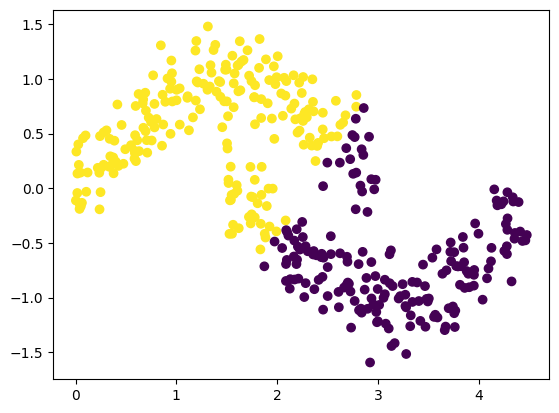

In [144]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred)
plt.show()

In [176]:
# DBSCAN : 밀도 기반 클러스터링

from sklearn.cluster import DBSCAN

# 반경(epsilon)이 0.3 이내의 최소 10개 데이터씩 군집화
db_model = DBSCAN(eps=0.3, min_samples=10)
db_model.fit(data[:, :2])

DBSCAN(eps=0.3, min_samples=10)

In [177]:
label = db_model.labels_ # -1 : 이상치 자동 감지됨

# 1그룹으로 분류된 data
n_noise = list(label).count(-1)
n_cluster = len(set(label)) - (1 if -1 in label else 0)
print('이상치 갯수 :', n_noise, '예측된 클러스터 갯수 :', n_cluster)

이상치 갯수 : 3 예측된 클러스터 갯수 : 2


In [178]:
label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

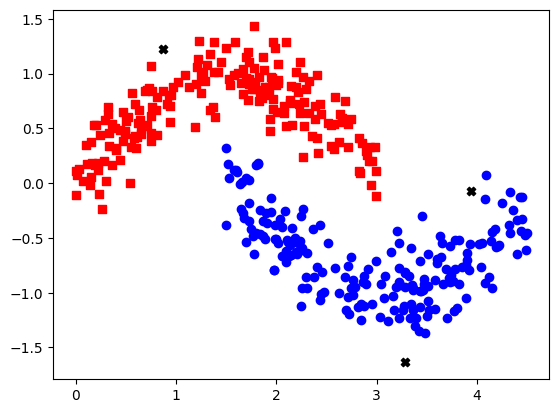

In [179]:
colors = ['r', 'b']
markers = ['s', 'o']

for i in range(n_cluster):
    plt.scatter(x=data[label==i, 0], y=data[label==i, 1], c=colors[i], marker=markers[i])
plt.scatter(x=data[label==-1, 0], y=data[label==-1,1], c='k', marker='X')

# 5절 군집모형의 성능평가

- score 함수를 통해 예측 모형 평가(분류, 회귀. 군집에서는 안 씀)
- metrics 모듈의 함수를 통해 군집 모형 평가(클러스터 소속과 갯수를 모두 알고 있을 때)
- 실루엣 계수(클러스터 소속과 갯수를 모를 때)

## 5.1 metrics 함수 이용

In [180]:
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
78,6.0,2.9,4.5,1.5,1


In [181]:
iris_X = iris.iloc[:, :-1]
iris_y = iris.iloc[:, -1]
iris_X.shape, iris_y.shape

((150, 4), (150,))

In [186]:
# 3개 그룹으로 군집화
from sklearn.cluster import KMeans

iris_model3 = KMeans(n_clusters=3, random_state=1, n_init=10)
iris_model3.fit(iris_X)
pred = iris_model3.labels_
# pred = iris_model3.predict(iris_X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [187]:
# pred 조정(1→0, 0→1, 2→2) np.choose(인덱스들, 값들)

pred3 = np.choose(pred, [1,0,2]) # 3개 그룹으로 군집화한 결과

In [191]:
# 3개 그룹으로 군집화한 자료

print('실제값 : \n', iris_y[::50])
print('예측값 : ', pred3[::50])

실제값 : 
 0      0
50     1
100    2
Name: species, dtype: int32
예측값 :  [0 1 2]


In [192]:
# 2개 그룹으로 군집화

iris_model2 = KMeans(n_clusters=2, n_init=10, random_state=1)
iris_model2.fit(iris_X)
pred2 = iris_model2.labels_
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [193]:
# 2개 그룹으로 군집화한 자료

iris_y2 = np.array([0]*50+[1]*100) # 실제값이 없어서 만들어주는것. 원래는 3종으로 나뉜게 실제값이니까
print('실제값 :', iris_y2)
print('예측값 :', pred2)

실제값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
예측값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### 조정된 rand 지수

In [194]:
from sklearn.metrics import adjusted_rand_score

# 3개 그룹 평가
adjusted_rand_score(labels_true=iris_y, # 실제값
                    labels_pred=pred3)  # 예측값

0.7302382722834697

In [195]:
# 2개 그룹 평가
adjusted_rand_score(labels_true=iris_y2,
                    labels_pred=pred2)

0.920405050901892

### 상호의존도를 나타내는 지표

- 두 군집간 정보 공유 정도

In [200]:
species_name = le.inverse_transform(iris_y) # 실제값 원형(이름)
pred_name = le.inverse_transform(pred3) # 예측값(이름)

In [202]:
from sklearn.metrics import mutual_info_score

# 3그룹 평가
print(mutual_info_score(iris.species, pred3))     # 숫자
print(mutual_info_score(species_name, pred_name)) # 문자
print(mutual_info_score(iris.species, pred_name)) # 숫자,문자

0.8255910976103356
0.8255910976103356
0.8255910976103356


In [203]:
# 2그룹 평가
mutual_info_score(iris_y2, pred2)

0.5596576064224734

### 그 외 클러스터링 성능평가 기준들

In [206]:
from sklearn.metrics import homogeneity_score

print('3그룹 :', homogeneity_score(iris.species, pred3))     # 숫자
print('3그룹 :', homogeneity_score(species_name, pred_name)) # 문자
print('2그룹 :', homogeneity_score(iris_y2, pred2))

3그룹 : 0.7514854021988338
3그룹 : 0.7514854021988338
2그룹 : 0.8792539652679946


In [207]:
from sklearn.metrics import completeness_score

print('3그룹 :', completeness_score(iris.species, pred3))
print('3그룹 :', completeness_score(species_name, pred_name))
print('2그룹 :', completeness_score(iris_y2, pred2))

3그룹 : 0.7649861514489815
3그룹 : 0.7649861514489815
2그룹 : 0.861693475999054


In [209]:
# homogeneity_score와 completeness_score의 조화평균

from sklearn.metrics import v_measure_score
print('3그룹 :', v_measure_score(iris.species, pred3))
print('3그룹 :', v_measure_score(species_name, pred_name))
print('2그룹 :', v_measure_score(iris_y2, pred2))

3그룹 : 0.7581756800057784
3그룹 : 0.7581756800057784
2그룹 : 0.870385156563164


## 5.2 실루엣 계수

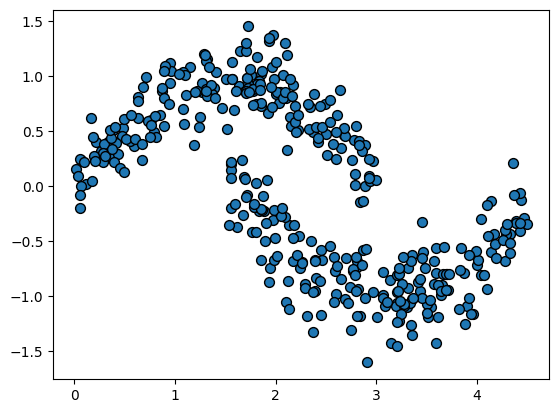

In [216]:
np.random.seed(0)
X1 = np.random.rand(200)*3 # 0 <= rand(데이터 갯수) < 1 : 균등분포  / *3을 하여 0~3 사이의 데이터 200개
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1)+noise
# plt.scatter(x=X1, y=Y1)
group1 = np.c_[X1, Y1, np.full(len(X1), 0)]

X2 = X1 + 1.5
noise = np.random.normal(0, 0.23, X1.shape)
Y2 = np.cos(X2) + noise
# plt.scatter(X2, Y2)
group2 = np.c_[X2, Y2, np.full(len(X2), 1)]

data = np.r_[group1, group2]

plt.scatter(x=data[:, 0], y=data[:, 1], s=50, edgecolors='k')
plt.show()

In [218]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_cluster in range_n_clusters:
    model = KMeans(n_clusters=n_cluster, 
                   n_init=10,
                   random_state=0)
    model.fit(data[:, :-1])
    # print('클러스터 수 :', n_cluster)
    # print(model.labels_)
    score = silhouette_score(X=data[:, :-1], labels=model.labels_)
    print('클러스터 : {}, 실루엣 계수 : {}'.format(n_cluster, score))
    
# 실루엣 계수가 가장 높은 7개로 클러스터링을 할 예정


클러스터 : 2, 실루엣 계수 : 0.5306796908214294
클러스터 : 3, 실루엣 계수 : 0.4649331550090052
클러스터 : 4, 실루엣 계수 : 0.47148772439392883
클러스터 : 5, 실루엣 계수 : 0.4848292311510994
클러스터 : 6, 실루엣 계수 : 0.47567836056857743
클러스터 : 7, 실루엣 계수 : 0.49996788654543395
클러스터 : 8, 실루엣 계수 : 0.4880046044413608
클러스터 : 9, 실루엣 계수 : 0.45670531552549887
클러스터 : 10, 실루엣 계수 : 0.45107176416776723


In [219]:
model = KMeans(n_clusters=7, init='random', n_init=10)
model.fit(data[:, :-1])
pred = model.labels_
pred = model.predict(data[:, :-1])

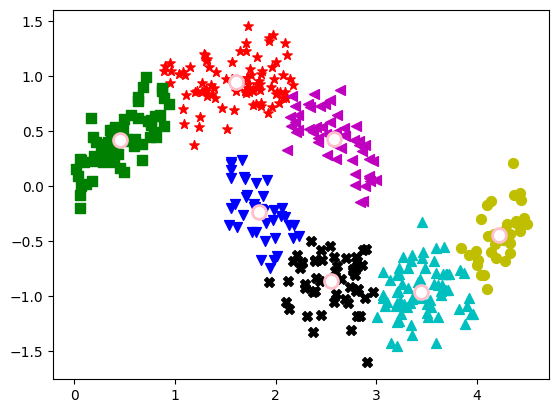

In [225]:
centers = model.cluster_centers_
colors = ['r', 'g', 'b','c','y','m','k'] # 0,1,5 / 2,3,4,6
markers = ['*', 's', 'v', '^', 'o', '<', 'X']

# 0클러스터로 분류된 데이터
# data[pred==0]

for i, c in enumerate(centers):
    # print(i,c)
    plt.scatter(x=data[pred==i, 0], y=data[pred==i, 1], s=50, c=colors[i], marker=markers[i])
    plt.scatter(x=c[0], y=c[1], s=100, c='w', edgecolors='pink', lw=2)

# 6절 연습문제

In [ ]:
# 1. iris 데이터의 petal_length열과 petal_width열을 이용해서 K-Means 알고리즘으로 군집분석하고 그래프로 시각화하세요(단, 각 클러스터의 중심점이 함께 표시되고 군의 수는 2로 설정)